# Scalability

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os

## Load Data

In [2]:
def load_scalability_data(part: int) -> pd.DataFrame:
    path = Path("../results/") / f"scalability_{part}" / "results.csv"
    return pd.read_csv(path)

### Scalability Results

In [3]:
dfs = [load_scalability_data(i) for i in range(6)]

In [4]:
df_0_5 = pd.read_csv("../results/scalability_0-5-0/results.csv")

In [5]:
df_0_5["algorithm"] = df_0_5["algorithm"] + "-0.5.0"

In [6]:
dfs += [df_0_5]

#### Distributed

In [7]:
distributed = pd.read_csv("../results/distributed.csv")

In [8]:
distributed = distributed.groupby(["length", "width"]).mean().reset_index()

In [9]:
distributed["algorithm"] = "S2G++20p-KDE-Distributed"
distributed["collection"] = "GutenTAG"
distributed["execute_main_time"] = distributed["time"]
distributed["dataset_length"] = distributed["length"]
distributed["dataset_width"] = distributed["width"]

### Combine Results

In [10]:
def get_dataset_length(dataset_name: str) -> int:
    return int(dataset_name.split(".")[0].split("-")[1])

def get_dataset_width(dataset_name: str) -> int:
    return int(dataset_name.split(".")[0].split("-")[2])

In [11]:
df = pd.concat(dfs, ignore_index=True)

In [12]:
df.loc[:, "dataset_length"] = df.dataset.apply(get_dataset_length)
df.loc[:, "dataset_width"] = df.dataset.apply(get_dataset_width)

In [13]:
df = pd.concat([df, distributed], ignore_index=True)

## Plot

In [14]:
sns.set(rc={"figure.figsize":(20, 10)})

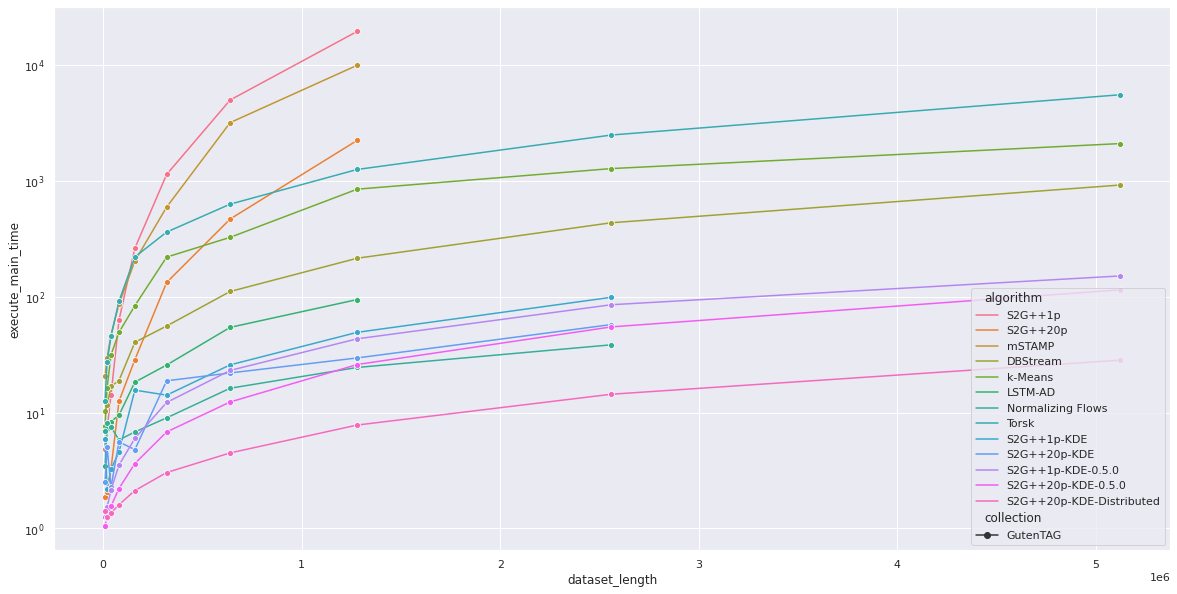

In [15]:
g = sns.lineplot(data=df[(df.dataset_width == 1)], x="dataset_length", y="execute_main_time", hue="algorithm", style="collection", markers=True)
g.set(yscale="log");

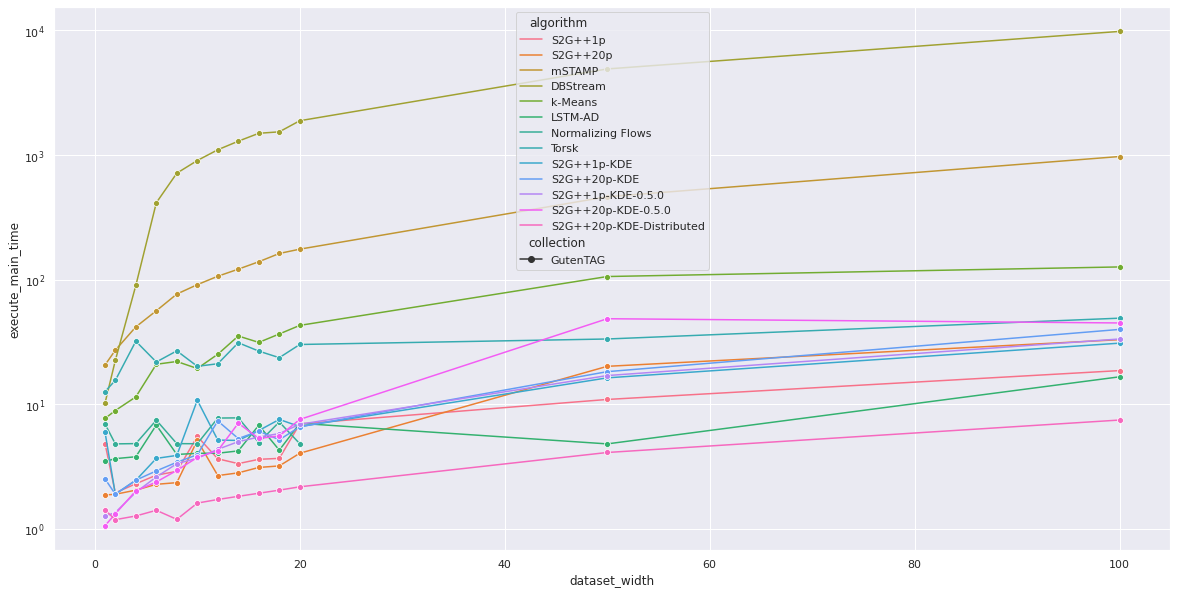

In [70]:
g = sns.lineplot(data=df[(df.dataset_length == 10000)], x="dataset_width", y="execute_main_time", hue="algorithm", style="collection", markers=True)
g.set(yscale="log");

### Export

In [18]:
df[(df.dataset_length == 10000)].pivot_table(index="algorithm", columns="dataset_width", values="execute_main_time").transpose().reset_index()#.to_csv("scalability.width.csv", index=False)

algorithm,dataset_width,DBStream,LSTM-AD,Normalizing Flows,S2G++1p,S2G++1p-KDE,S2G++1p-KDE-0.5.0,S2G++20p,S2G++20p-KDE,S2G++20p-KDE-0.5.0,S2G++20p-KDE-Distributed,Torsk,k-Means,mSTAMP
0,1,10.227339,3.461778,6.909607,4.804873,5.918116,1.259045,1.863420,2.503420,1.057614,1.410000,12.620404,7.676753,20.640787
1,2,22.413130,3.647136,4.791235,1.937354,1.889298,1.346116,1.886732,1.891321,1.312951,1.180000,15.506306,8.875370,27.080781
2,4,89.612265,3.776894,4.816324,2.291188,2.442965,1.958729,2.036788,2.449051,2.011713,1.263333,31.978691,11.421556,41.665785
3,6,413.907928,6.787711,7.426886,2.688184,3.664269,2.599850,2.268847,2.907801,2.368453,1.403333,21.778474,20.877445,56.154374
4,8,714.712540,3.941744,4.814138,2.881623,3.870419,3.322503,2.339928,3.410247,2.932214,1.186667,26.760785,21.980744,76.471721
5,10,903.533153,4.023766,4.802366,5.499615,10.740805,3.674994,5.111495,3.924336,3.728151,1.603333,20.107536,19.311281,90.997920
6,12,1102.233179,4.032016,7.723624,3.636079,5.139957,4.336365,2.666758,7.321415,4.225811,1.713333,21.088353,25.132072,106.322061
7,14,1291.510927,4.207228,7.751915,3.325918,5.107351,4.992607,2.803880,5.286921,7.025648,1.816667,31.090036,35.221116,121.210016
8,16,1494.689184,6.764374,4.912410,3.602027,6.131486,5.435390,3.099010,6.064129,5.297872,1.923333,26.637617,31.281810,139.020226
9,18,1535.423589,4.267905,7.182726,3.664414,7.530530,5.797826,3.187428,5.169459,5.546942,2.036667,23.581891,36.559761,161.980610


In [85]:
df[(df.dataset_width == 1)].pivot_table(index="algorithm", columns="dataset_length", values="execute_main_time").transpose().reset_index()#.to_csv("scalability.length.csv", index=False)

algorithm,dataset_length,DBStream,LSTM-AD,Normalizing Flows,S2G++1p,S2G++1p-KDE,S2G++1p-KDE-0.5.0,S2G++20p,S2G++20p-KDE,S2G++20p-KDE-0.5.0,S2G++20p-KDE-Distributed,Torsk,k-Means,mSTAMP
0,10000,10.227339,3.461778,6.909607,4.804873,5.918116,1.259045,1.863420,2.503420,1.057614,1.410000,12.620404,7.676753,20.640787
1,20000,11.525136,7.165915,8.057355,7.166055,2.194416,1.520268,2.044110,5.007481,1.224476,1.253333,27.210801,16.254282,29.360694
2,40000,16.832045,8.357519,7.509578,14.236824,3.244735,2.150087,3.269566,2.272424,1.555992,1.360000,45.514671,31.466975,47.142729
3,80000,18.883981,9.481351,5.801893,62.431807,4.564452,3.521258,12.523308,5.581613,2.208966,1.603333,91.356143,49.202671,86.416131
4,160000,40.377277,18.294700,6.797325,261.563562,15.615127,5.985265,28.568027,4.786094,3.631557,2.120000,220.101708,83.619628,202.810957
5,320000,55.798136,25.700346,8.992028,1134.460992,14.125096,12.210414,132.579335,18.787718,6.800578,3.036667,360.861759,219.447147,592.917012
6,640000,110.845402,54.333868,16.213715,4980.513747,25.790977,23.092348,467.861328,21.964956,12.337422,4.483333,628.694986,325.135552,3177.520252
7,1280000,214.628513,94.413251,24.490196,19462.465145,49.226521,43.271510,2233.226362,29.590442,25.968224,7.800000,1252.505579,846.638153,9934.105324
8,2560000,434.370188,NaN,38.418459,NaN,98.779905,85.200146,NaN,57.450227,54.831136,14.386667,2483.037188,1274.883514,NaN
9,5120000,918.304446,NaN,NaN,NaN,NaN,150.844236,NaN,NaN,114.487043,28.303333,5522.755763,2093.787530,NaN
